# Importing the Basic Relevant Libraries

In [220]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [156]:
data = pd.read_csv('1.04.Real-life example.csv')
data.sample(5)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
2256,BMW,10999.00,other,162,2.2,Petrol,yes,2002,320
3830,Renault,7440.00,other,148,1.5,Diesel,yes,2012,Kangoo
451,Volkswagen,67622.55,crossover,0,3.0,Diesel,yes,2016,Touareg
1671,Volkswagen,8200.00,other,102,1.6,Diesel,yes,2012,Caddy
3827,Volkswagen,10000.00,van,231,1.9,Diesel,yes,2005,T5 (Transporter)


# Task is to predict the price of the Used Car based on the available data

In [157]:
data_col = data.columns.to_list()
data_col

['Brand',
 'Price',
 'Body',
 'Mileage',
 'EngineV',
 'Engine Type',
 'Registration',
 'Year',
 'Model']

In [158]:
data.shape

(4345, 9)

In [159]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,4173.0,19418.746935,25584.242620,600.0,6999.0,11500.0,21700.0,300000.00
Mileage,4345.0,161.237284,105.705797,0.0,86.0,155.0,230.0,980.00
EngineV,4195.0,2.790734,5.066437,0.6,1.8,2.2,3.0,99.99
Year,4345.0,2006.550058,6.719097,1969.0,2003.0,2008.0,2012.0,2016.00


In [160]:
 data.describe(include="object")

,Brand,Body,Engine Type,Registration,Model
count,4345,4345,4345,4345,4345
unique,7,6,4,2,312
top,Volkswagen,sedan,Diesel,yes,E-Class
freq,936,1649,2019,3947,199


In [161]:
data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [162]:
total_null_in_each_column = data.isnull().sum()
total_null_in_each_column

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [163]:
total_null = total_null_in_each_column.sum()
total_null

322

In [164]:
# We will drop the Model Column because Model can be guessed by Brand,Year and EngineV
new_data = data.drop(['Model'],axis = 1)
new_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Treating Null Values 

#### Since Total Null values are less < 5%. We can drop rows with null values in them

In [165]:
data_no_null = data.dropna(axis = 0)
data_no_null.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [166]:
data_no_null.shape

(4025, 9)

In [167]:
data_no_null.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [168]:
total_data_in_price = data_no_null['Price'].count().sum()
total_data_in_price

4025

In [169]:
data_no_null.describe(include="object")

,Brand,Body,Engine Type,Registration,Model
count,4025,4025,4025,4025,4025
unique,7,6,4,2,306
top,Volkswagen,sedan,Diesel,yes,E-Class
freq,880,1534,1861,3654,188


### Exploring Probability Distibution Function of each Feature

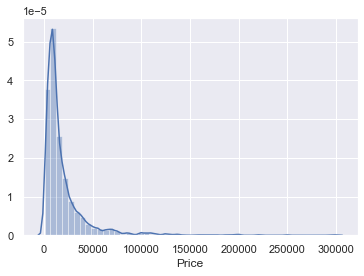

In [170]:
sns.distplot(data_no_null['Price'])

##### This data is not normally distributed. We need to remove outliers to make it normally distributed


In [171]:
#1. Normalizing Prize using IQR
        #Getting Q1
q1 = data_no_null['Price'].quantile(0.25)
q3 = data_no_null['Price'].quantile(0.75)
print(f'Q1:{q1}')
print(f'Q3:{q3}')

Q1:6999.0
Q3:21900.0


In [172]:
#CAlcilating IQR
iqr = q3-q1
iqr

14901.0

In [173]:
upperlimit = q3 + (1.5 * iqr)
lowerlimit = q1 - (1.5 * iqr)
print(f'UpperLimit: {upperlimit}')
print(f'LowerLimit: {lowerlimit}')

UpperLimit: 44251.5
LowerLimit: -15352.5


In [174]:
removed_price = data_no_null[(data_no_null['Price']>upperlimit)|(data_no_null['Price']< lowerlimit)]
removed_price.shape

(355, 9)

In [175]:
data_no_null =data_no_null[(data_no_null['Price']<upperlimit)&(data_no_null['Price']>lowerlimit)]
data_no_null.shape

(3670, 9)

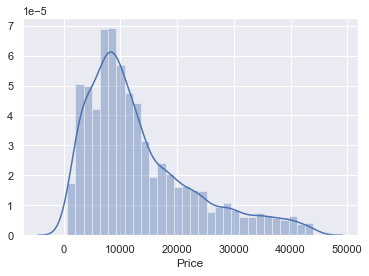

In [176]:
sns.distplot(data_rem_price['Price'])

In [177]:
total_data_removed = total_data_in_price - data_no_null.shape[0]
total_data_removed

355

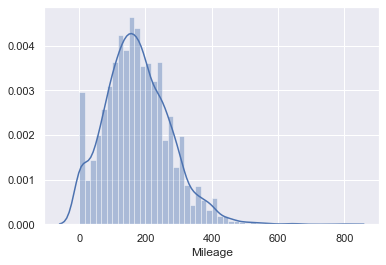

In [178]:
sns.distplot(data_no_null['Mileage']) # this data looks normalized

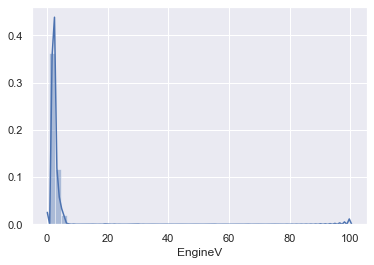

In [179]:
sns.distplot(data_no_null['EngineV'])

In [180]:
#1. Normalizing Engine using IQR
        #Getting Q1
q1 = data_no_null['EngineV'].quantile(0.25)
q3 = data_no_null['EngineV'].quantile(0.75)
print(f'Q1:{q1}')
print(f'Q3:{q3}')

Q1:1.8
Q3:2.8


In [181]:
iqr = q3-q1
iqr

0.9999999999999998

In [182]:
upperlimit = q3 + (1.5 * iqr)
lowerlimit = q1 - (1.5 * iqr)
print(f'UpperLimit: {upperlimit}')
print(f'LowerLimit: {lowerlimit}')

UpperLimit: 4.299999999999999
LowerLimit: 0.3000000000000005


In [183]:
new_df = data_no_null

a = new_df.shape
a

(3670, 9)

In [192]:
data_no_null =data_no_null[data_no_null['EngineV']<6.5]
data_no_null.shape

(3647, 9)

In [193]:
total_env_data_removed = a[0] - data_no_null.shape[0]
total_env_data_removed

23

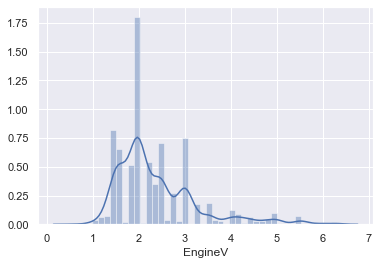

In [194]:
sns.distplot(data_no_null['EngineV'])

In [201]:
data_no_null.shape

(3647, 9)

In [202]:
data_cleaned = data_no_null.reset_index(drop=True)

In [203]:
data_cleaned.head(5)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [204]:
data_cleaned = data_cleaned.drop(['Model'],axis = 1)
data_cleaned.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3647,3647.000000,3647,3647.000000,3647.000000,3647,3647,3647.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1447,NaN,NaN,1624,3282,NaN
mean,NaN,13368.454184,NaN,175.436797,2.369890,NaN,NaN,2005.651769
std,NaN,9585.325198,NaN,97.659707,0.896921,NaN,NaN,6.520732
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6700.000000,NaN,108.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,10500.000000,NaN,168.000000,2.000000,NaN,NaN,2007.000000
75%,NaN,17900.000000,NaN,238.000000,2.800000,NaN,NaN,2011.000000


In [205]:
data_cleaned.shape

(3647, 8)

In [214]:
data_cleaned.Mileage.quantile(0.9999)

745.3099999999495

In [217]:
data_cleaned.Price.quantile(0.9999)

44000.0

In [218]:
data_cleaned.EngineV.quantile(0.9999)

6.3

# Checking OLS assumptions

## Assumption :1 : Linearity: To check if data in linearly distributed 
## Getting scatter plot for Year,EngineV and Mileange

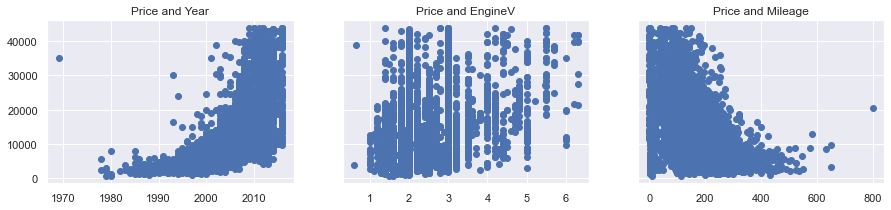

In [221]:
f,(ax1,ax2,ax3) = plt.subplots(1,3 ,sharey=True,figsize = (15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

### Since data is no linearly distrbuted we need to perform log transformation on data to make sure that the data is linearly distributed
### we can use np.log(x) to do the same

In [223]:
data_cleaned['Log Price'] = np.log(data_cleaned['Price'])
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


### Plotting the scatter plot again with Logged Price

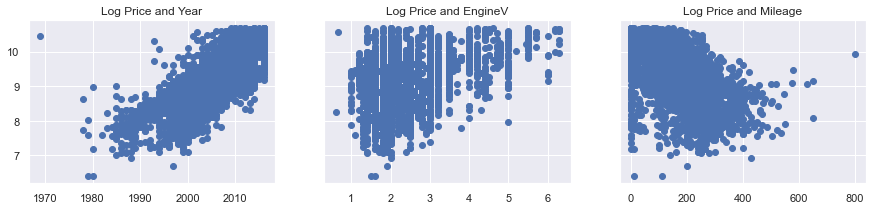

In [225]:
f,(ax1,ax2,ax3) = plt.subplots(1,3 ,sharey=True,figsize = (15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Log Price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Log Price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Log Price'])
ax3.set_title('Log Price and Mileage')

plt.show()

## Multicollinearity

In [226]:
data_cleaned.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Log Price'], dtype=object)

#### Calculating VIF to check for multicollinearity

In [231]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vf
var = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [vf(var.values,i) for i in range(var.shape[1])]
vif['Features'] = var.columns

In [232]:
vif

,VIF,Features
0,4.238966,Mileage
1,10.325593,Year
2,8.051822,EngineV


In [233]:
#Since VIF of year > 10 we will drop this column
data_no_multicollinearity = data_cleaned.drop(['Year'],axis = 1)
data_no_multicollinearity

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Log Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...,...
3642,Volkswagen,11500.0,van,163,2.5,Diesel,yes,9.350102
3643,Toyota,17900.0,sedan,35,1.6,Petrol,yes,9.792556
3644,BMW,6500.0,sedan,1,3.5,Petrol,yes,8.779557
3645,BMW,8000.0,sedan,194,2.0,Petrol,yes,8.987197


# Creating Dummy Variables

In [234]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity,drop_first = True)
data_with_dummies

,Price,Mileage,EngineV,Log Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3642,11500.0,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3643,17900.0,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3644,6500.0,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
3645,8000.0,194,2.0,8.987197,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [236]:
data_with_dummies = data_with_dummies.drop(['Price'],axis = 1)
data_with_dummies

,Mileage,EngineV,Log Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3642,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3643,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3644,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
3645,194,2.0,8.987197,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


### Rearrange data set

In [238]:
col_list = data_with_dummies.columns.to_list()

In [240]:
col_list = ['Log Price',
            'Mileage',
 'EngineV',
 'Brand_BMW',
 'Brand_Mercedes-Benz',
 'Brand_Mitsubishi',
 'Brand_Renault',
 'Brand_Toyota',
 'Brand_Volkswagen',
 'Body_hatch',
 'Body_other',
 'Body_sedan',
 'Body_vagon',
 'Body_van',
 'Engine Type_Gas',
 'Engine Type_Other',
 'Engine Type_Petrol',
 'Registration_yes']

In [241]:
col_list

['Log Price',
 'Mileage',
 'EngineV',
 'Brand_BMW',
 'Brand_Mercedes-Benz',
 'Brand_Mitsubishi',
 'Brand_Renault',
 'Brand_Toyota',
 'Brand_Volkswagen',
 'Body_hatch',
 'Body_other',
 'Body_sedan',
 'Body_vagon',
 'Body_van',
 'Engine Type_Gas',
 'Engine Type_Other',
 'Engine Type_Petrol',
 'Registration_yes']

In [246]:
data_preprocessed = data_with_dummies[col_list]
data_preprocessed.head()

,Log Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Linear Regression Model

## Declare Target and Input Data

In [247]:
data_preprocessed.columns

Index(['Log Price', 'Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [251]:
target = data_preprocessed['Log Price']
inputs = data_preprocessed.drop(['Log Price'],axis=1)

## Scaleing of Data

In [252]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
x_scaled = scaler.transform(inputs)

In [255]:
#Standardization is not recommended for dummy variables 
#Scaling does not effect the prediction power of dummy variables. But Once scaled they loose their dummy meaning0

## Train Test Split


In [256]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,target,test_size = 0.2, random_state=365)

# Regression

In [257]:
reg = LinearRegression()

In [258]:
reg.fit(x_train,y_train)

LinearRegression()

In [260]:
y_hat = reg.predict(x_train) #y_hat is the prediction value

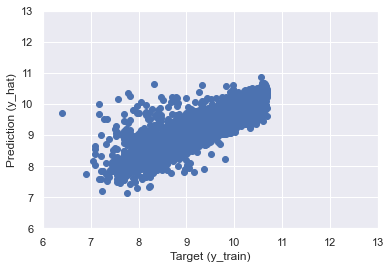

In [261]:
plt.scatter(y_train,y_hat)
plt.xlabel('Target (y_train)')
plt.ylabel('Prediction (y_hat)')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residual PDF')

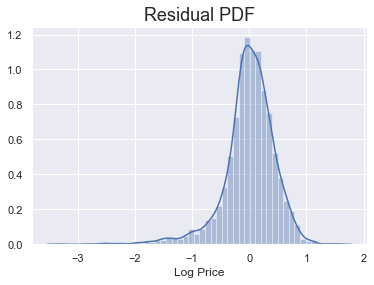

In [263]:
sns.distplot(y_train-y_hat)
plt.title("Residual PDF",size=18)

## R-Squared

In [264]:
reg.score(x_train,y_train)

0.6478740150532835

# Finding weight and bias

In [265]:
reg.intercept_

9.244454462474259

In [266]:
reg.coef_

array([-0.37695026,  0.18242864,  0.00197618, -0.00160153, -0.11529726,
       -0.15627737, -0.02691764, -0.06872446, -0.15464607, -0.08859298,
       -0.19906095, -0.11727449, -0.15417309, -0.10819386, -0.0335629 ,
       -0.11609069,  0.31156254])

In [267]:
reg_summary = pd.DataFrame(inputs.columns.values , columns=['Features'])
reg_summary['Weight'] = reg.coef_
reg_summary

,Features,Weight
0,Mileage,-0.376950
1,EngineV,0.182429
2,Brand_BMW,0.001976
3,Brand_Mercedes-Benz,-0.001602
4,Brand_Mitsubishi,-0.115297
5,Brand_Renault,-0.156277
6,Brand_Toyota,-0.026918
7,Brand_Volkswagen,-0.068724
8,Body_hatch,-0.154646
9,Body_other,-0.088593


# Testing Part

In [269]:
y_hat_test = reg.predict(x_test)

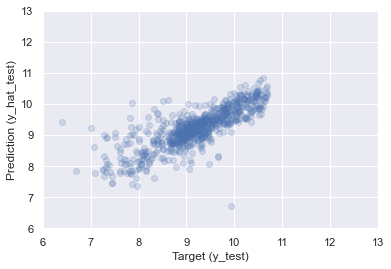

In [271]:
plt.scatter(y_test,y_hat_test,alpha= 0.2)
plt.xlabel('Target (y_test)')
plt.ylabel('Prediction (y_hat_test)')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [273]:
df_pf = pd.DataFrame(np.exp(y_hat_test) , columns = ['Prediction'])
df_pf.head()

,Prediction
0,9085.824376
1,20269.879702
2,11581.079411
3,9836.434177
4,12045.450528


In [274]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,9085.824376,NaN
1,20269.879702,NaN
2,11581.079411,NaN
3,9836.434177,NaN
4,12045.450528,NaN
...,...,...
725,2536.003984,NaN
726,3821.257779,NaN
727,13583.077103,NaN
728,17553.195656,10800.0


In [276]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0     8.665613
1    10.257659
2     9.190138
3     9.200290
4     9.210240
Name: Log Price, dtype: float64

In [277]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,9085.824376,5800.0
1,20269.879702,28500.0
2,11581.079411,9800.0
3,9836.434177,9900.0
4,12045.450528,9999.0
...,...,...
725,2536.003984,2600.0
726,3821.257779,3900.0
727,13583.077103,29000.0
728,17553.195656,14200.0


In [278]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference %'] = np.absolute(df_pf['Residual'] /df_pf['Target']*100)

In [279]:
df_pf

,Prediction,Target,Residual,Difference %
0,9085.824376,5800.0,-3285.824376,56.652144
1,20269.879702,28500.0,8230.120298,28.877615
2,11581.079411,9800.0,-1781.079411,18.174280
3,9836.434177,9900.0,63.565823,0.642079
4,12045.450528,9999.0,-2046.450528,20.466552
...,...,...,...,...
725,2536.003984,2600.0,63.996016,2.461385
726,3821.257779,3900.0,78.742221,2.019031
727,13583.077103,29000.0,15416.922897,53.161803
728,17553.195656,14200.0,-3353.195656,23.614054


In [280]:
df_pf.describe()

,Prediction,Target,Residual,Difference %
count,730.000000,730.000000,730.000000,730.000000
mean,12348.547513,12985.937712,637.390200,42.470194
std,7604.839328,9574.263366,5436.155168,99.764369
min,833.246933,600.000000,-20256.113812,0.004944
25%,7189.384333,6700.000000,-1944.187708,10.067108
50%,10490.570311,9925.000000,-123.236061,22.260356
75%,15391.258013,17500.000000,2697.517841,41.262201
max,50654.192763,44000.000000,22724.612503,1940.602086


In [284]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format',lambda x:'%.2f' % x)
df_pf.sort_values(by = ['Difference %'])

,Prediction,Target,Residual,Difference %
157,5999.70,6000.00,0.30,0.00
311,11201.99,11200.00,-1.99,0.02
466,6001.29,6000.00,-1.29,0.02
273,9819.35,9800.00,-19.35,0.20
300,19240.90,19200.00,-40.90,0.21
27,9466.07,9500.00,33.93,0.36
453,14638.79,14700.00,61.21,0.42
84,11349.25,11300.00,-49.25,0.44
541,7335.67,7300.00,-35.67,0.49
547,13568.74,13500.00,-68.74,0.51
